In [1]:
#%matplotlib inline
%matplotlib widget
from ipyleaflet import *
import ipywidgets as widgets
from ipywidgets import HTML, Layout, IntSlider, RadioButtons, Dropdown, Button, Output, Label
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import random
import json
import netCDF4 as nc

In [2]:
# Variable setup
x, y = 0, 0
dummy_num = 0
#with open('data/europe_110.geo.json', 'r') as f:
with open('data/poly_aqua_cro_wgs.geo.json', 'r') as f:
    data = json.load(f)
name = "Dummy"
feature_clicked = False
layer1_p = "data//00483_25794_00001.nc"
# layer1_p = "../Blue-Cloud Data Pool/MED-mixed_layer_depth-483/download_1/00483_25794_00001.nc"
layer1_d = nc.Dataset(layer1_p)
#for var in layer1_d.variables.values():
#for var in layer1_d.variables:
#    print(var)
data_dummy = np.array(layer1_d["Mixed_Layer_Depth"][0, :, :], dtype=np.float64)
data_dummy[data_dummy>1e+30] = np.nan #because it is a masked array

lons = np.array(layer1_d["lon"][:], dtype=np.float64)
lats = np.array(layer1_d["lat"][:], dtype=np.float64)

In [3]:
# Map setup
defaultLayout=Layout(width='1000px', height='500px')
center=(40,20)
m = Map(center=center,
       #basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2022-01-01"),
       basemap=basemaps.Gaode.Satellite,
        zoom=4,
       layout=defaultLayout)

image1 = ImageOverlay(
    url="data_dummy1.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="viridis"
)
image2 = ImageOverlay(
    url="data_dummy2.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="magma"
)
image3 = ImageOverlay(
    url="data_dummy3.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="Blues"
)

m.add_layer(image1)
m.add_layer(image2)
m.add_layer(image3)

label = Label(layout=Layout(width="100%"))

def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        #m.add_layer(Marker(location=kwargs.get('coordinates')))
        #print("You clicked on: ", kwargs.get('coordinates'))
        
        global x
        global y
        global dummy_num
        global feature_clicked
        
        x, y = kwargs.get('coordinates')
        idx = (np.abs(lats-x)).argmin()
        idy = (np.abs(lons-y)).argmin()
        #print(idx, idy)
        val_mixed_layer_depth = data_dummy[idx,idy]
        dummy_num += 1
        message1 = HTML()
        if feature_clicked:
            message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Mixed layer depth: {np.round(val_mixed_layer_depth, 2)} m <br>  Aquaculture name: {name} <br> Number: {dummy_num}"
        else:
            message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Mixed layer depth: {np.round(val_mixed_layer_depth, 2)} m <br> Number: {dummy_num}"
            label.value = "No aquaculture selected"
        popup = Popup(
            location=(x, y),
            child=message1,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
        m.add_layer(popup)
        feature_clicked=False
        
m.on_interaction(handle_click)

def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'fillOpacity': 0.5, 'weight': 1
    },
    hover_style={
        'color': 'white', 'fillOpacity': 1
    },
    style_callback=random_color,
    name="Farm locations"
)

def click_handler(event=None, feature=None, id=None, properties=None):
    global name
    global feature_clicked
    feature_clicked=True
    #name = properties["geounit"]
    name = properties["species 1"]
    label.value = f"Aquaculture name: {name}"

geo_json.on_click(click_handler)

m.add_layer(geo_json)

control = LayersControl(position='topright')
m.add_control(control)


Map(center=[40, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

Label(value='', layout=Layout(width='100%'))

RadioButtons(description='Species:', options=('species 1', 'species 2', 'species 3'), value='species 1')

RadioButtons(description='Scenario:', options=('scenario 1', 'scenario 2', 'scenario 3'), value='scenario 1')

Button(description='Simulate!', style=ButtonStyle())

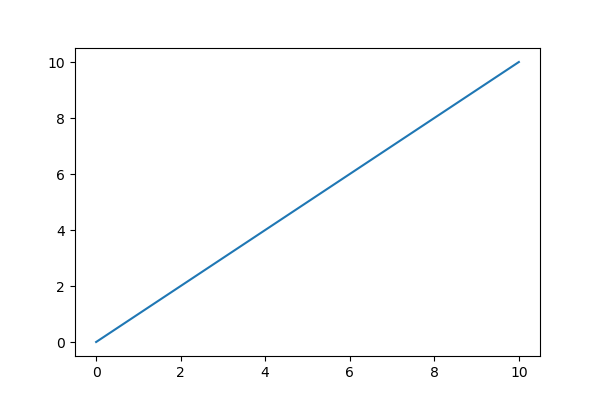

In [4]:
display(m)
# Print results
display(label)
radios = RadioButtons(options=["species 1", "species 2", "species 3"],
    description="Species:",
    disabled=False
)

radios2 = RadioButtons(options=["scenario 1", "scenario 2", "scenario 3"],
    description="Scenario:",
    disabled=False
)

display(radios)
display(radios2)

btn = Button(description="Simulate!")
out = Output()


fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(np.linspace(0,10), np.linspace(0,10))
title = ax.set_title("")

def update(change):
    line.set_ydata(np.random.randint(0, 10, 50))
    ax.set_title(f"{radios.value}")
    fig.canvas.draw()
    return

#radios.observe(update, "value")

btn.on_click(update)

display(btn)



ipyleaflet overview: https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a